# Average Directional Index (ADX)

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:average_directional_index_adx

Average Directional Index (ADX) is technical indicator; as a result, the values range from 0 to 100. The ADX gives a signal of trend strength.

If ADX is below 20, the trend is weak; however, if ADX is above 50, the trend is strong. ADX does not tell you the direction of the trend and it only gives the strength of the trend.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2018-12-31'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400


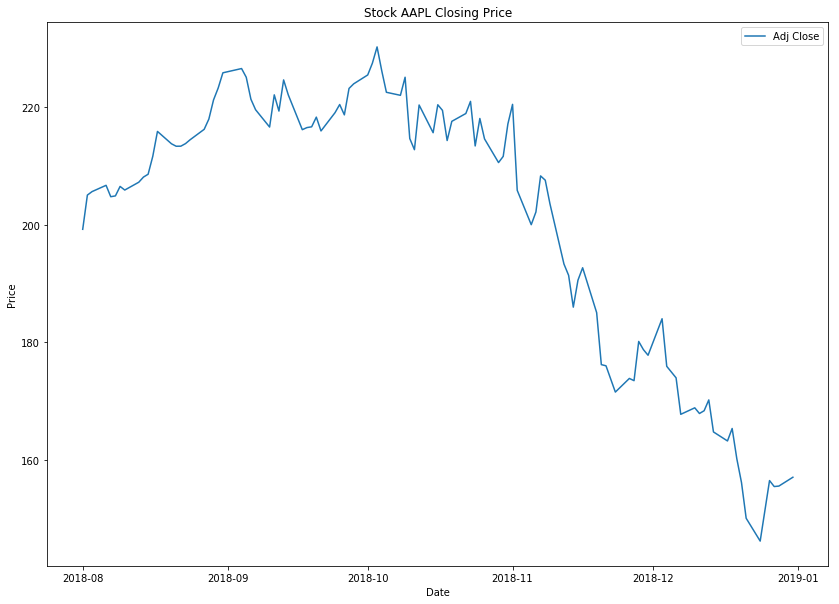

In [3]:
# Simple Line Chart
plt.figure(figsize=(14,10))
plt.plot(df['Adj Close'])
plt.legend(loc='best')
plt.title('Stock '+ symbol +' Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [4]:
import talib as ta

In [5]:
adx = ta.ADX(df['High'], df['Low'],df['Adj Close'], timeperiod=14)
adx = adx.dropna()
adx

Date
2018-09-10    62.531606
2018-09-11    59.716709
2018-09-12    57.256106
2018-09-13    55.642423
2018-09-14    54.124601
2018-09-17    50.932470
2018-09-18    47.923933
2018-09-19    44.593145
2018-09-20    42.191964
2018-09-21    39.416968
2018-09-24    36.651108
2018-09-25    34.517000
2018-09-26    32.787120
2018-09-27    31.855957
2018-09-28    30.991306
2018-10-01    30.990275
2018-10-02    31.106783
2018-10-03    31.855445
2018-10-04    31.419180
2018-10-05    29.258502
2018-10-08    27.177840
2018-10-09    25.817106
2018-10-10    24.800296
2018-10-11    24.523185
2018-10-12    23.458783
2018-10-15    22.470410
2018-10-16    21.271855
2018-10-17    20.158910
2018-10-18    20.373058
2018-10-19    20.170461
                ...    
2018-11-15    33.020647
2018-11-16    33.818358
2018-11-19    34.924261
2018-11-20    36.577722
2018-11-21    38.113078
2018-11-23    39.796565
2018-11-26    41.460844
2018-11-27    43.006245
2018-11-28    42.906678
2018-11-29    42.492468
2018-11-30 

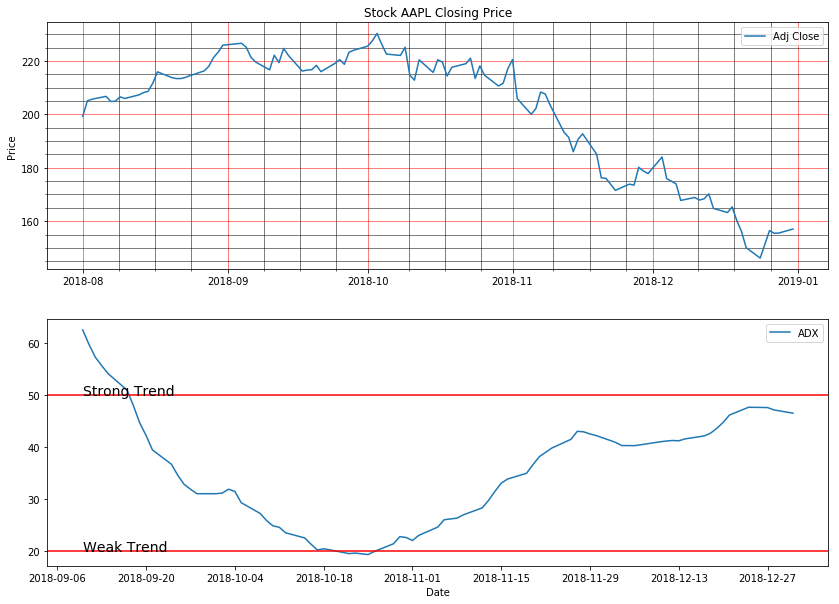

In [6]:
# Line Chart
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
#ax1.grid(True, which='both')
ax1.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax1.minorticks_on()
ax1.legend(loc='best')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')


ax2 = plt.subplot(2, 1, 2)
ax2.plot(adx, '-', label='ADX')
ax2.text(s='Strong Trend', x=adx.index[0], y=50, fontsize=14)
ax2.text(s='Weak Trend', x=adx.index[0], y=20, fontsize=14)
ax2.axhline(y=50,color='r')
ax2.axhline(y=20,color='r')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

## Candlestick with ADX

In [7]:
# Candlestick
dfc = df.copy()

from matplotlib import dates as mdates
import datetime as dt

dfc['ADX'] = ta.ADX(dfc['High'], dfc['Low'],dfc['Adj Close'], timeperiod=14)
dfc = dfc.dropna()
dfc.head()

,Open,High,Low,Close,Adj Close,Volume,ADX
Date,,,,,,,
2018-09-10,220.949997,221.850006,216.470001,218.330002,216.641724,39516500,62.531606
2018-09-11,218.009995,224.300003,216.559998,223.850006,222.119049,35749000,59.716709
2018-09-12,224.940002,225.000000,219.839996,221.070007,219.360550,49278700,57.256106
2018-09-13,223.520004,228.350006,222.570007,226.410004,224.659256,41706400,55.642423
2018-09-14,225.750000,226.839996,222.520004,223.839996,222.109100,31999300,54.124601


In [8]:
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ADX
0,736947.0,220.949997,221.850006,216.470001,218.330002,216.641724,39516500,62.531606
1,736948.0,218.009995,224.300003,216.559998,223.850006,222.119049,35749000,59.716709
2,736949.0,224.940002,225.000000,219.839996,221.070007,219.360550,49278700,57.256106
3,736950.0,223.520004,228.350006,222.570007,226.410004,224.659256,41706400,55.642423
4,736951.0,225.750000,226.839996,222.520004,223.839996,222.109100,31999300,54.124601


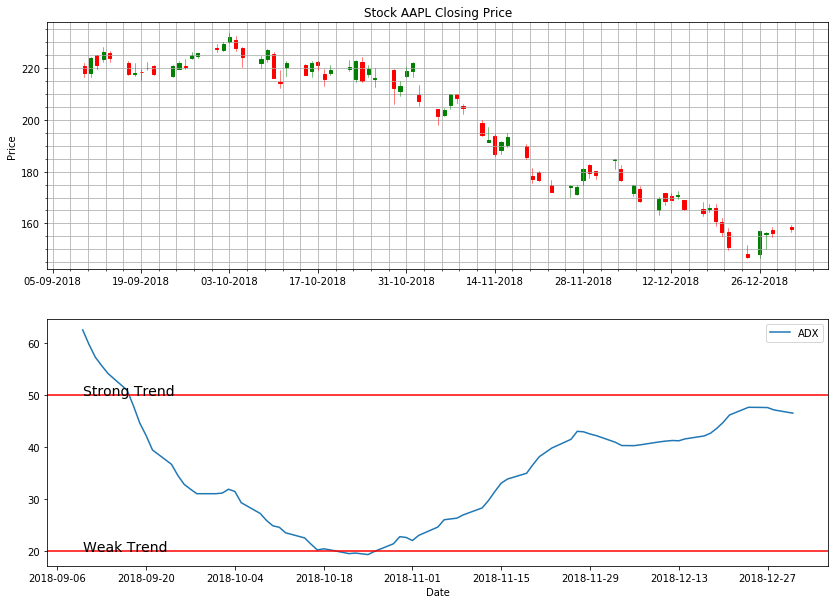

In [9]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
#ax1.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
#ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax1.minorticks_on()
#ax1.legend(loc='best')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')


ax2 = plt.subplot(2, 1, 2)
ax2.plot(adx, '-', label='ADX')
ax2.text(s='Strong Trend', x=adx.index[0], y=50, fontsize=14)
ax2.text(s='Weak Trend', x=adx.index[0], y=20, fontsize=14)
ax2.axhline(y=50,color='r')
ax2.axhline(y=20,color='r')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

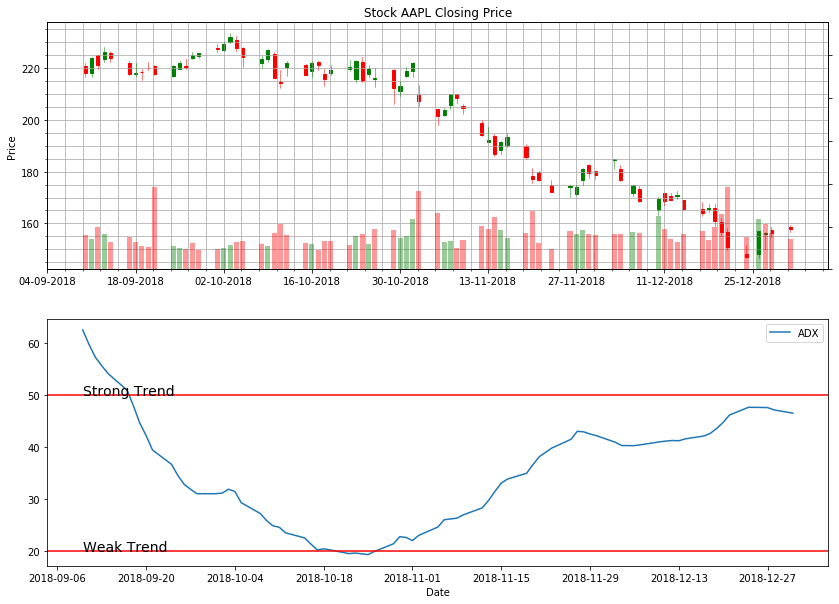

In [10]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(adx, '-', label='ADX')
ax2.text(s='Strong Trend', x=adx.index[0], y=50, fontsize=14)
ax2.text(s='Weak Trend', x=adx.index[0], y=20, fontsize=14)
ax2.axhline(y=50,color='r')
ax2.axhline(y=20,color='r')
ax2.set_xlabel('Date')
ax2.legend(loc='best')